In [1]:
from tsph import *

In [2]:
import numpy as np

In [3]:
from scipy import stats

# Logistic Map Analysis

We study the Logistic map $x_{n+1} = r x_n (1 - x_n)$ for uniformly sampled values of $r\in [3.6,4.0)$.

In [68]:
RANDOM_R = True

if RANDOM_R:
    r_values = np.random.uniform(3.6, 4.0, size=1000)  # uniformly sampled r values
    r_values = np.sort(r_values)
else:
    r_values = np.linspace(3.6, 4.0, 1000)  # evenly spaced r values

In [69]:
time_series = [logistic_map(r, 0.2, 1000) for r in r_values]

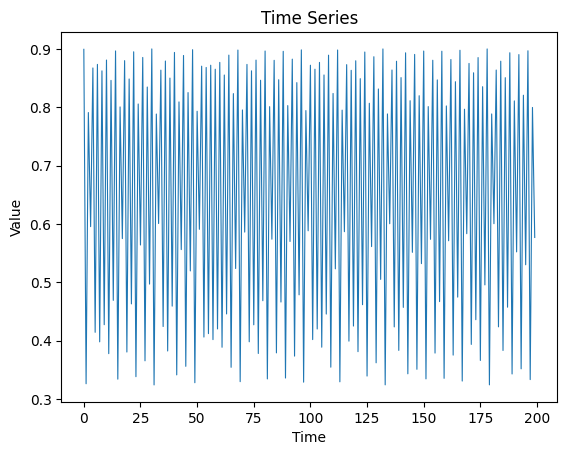

In [70]:
plot_time_series(time_series[0][:200], plot_kwargs=dict(lw=0.8))

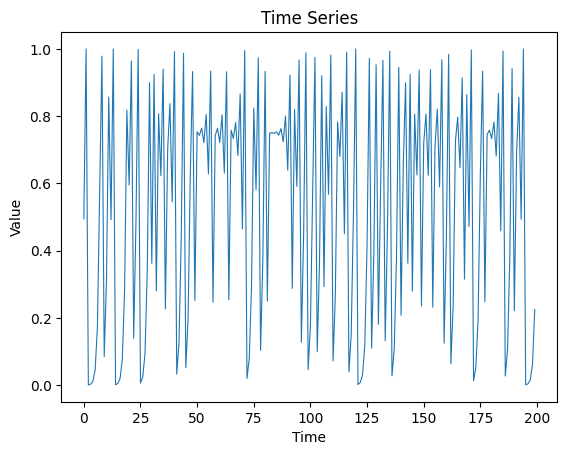

In [71]:
plot_time_series(time_series[-1][:200], plot_kwargs=dict(lw=0.8))

## Maximum Lyapunov Exponent of the Logistic Map

The Lyapunov exponent $\lambda\in\mathbb{R}$ is the analytical measure of rate of divergence of infinitessimally close initial conditions across the state space. For $\lambda > 0$ trajectories diverge and the dynamic state is considered chaotic.

In [72]:
lyapunov_exponents = lyapunov_approximation_for_logistic_map(r_values, x0=0.2)

In [73]:
import matplotlib.pylab as plt

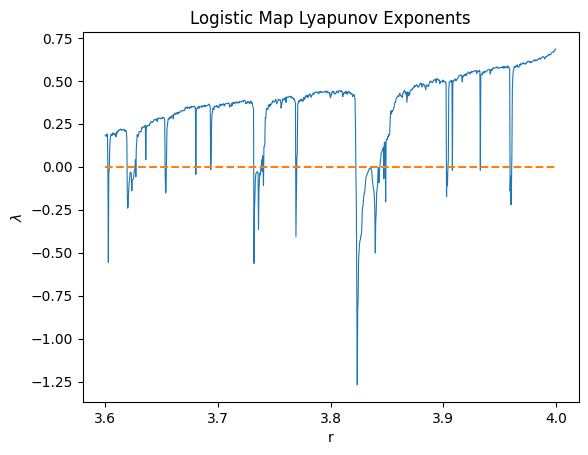

In [74]:
plt.plot(lyapunov_exponents, lw=0.8)
plt.plot([0, 1000], [0, 0], linestyle="dashed")
plt.xticks(ticks = np.arange(0, 1001, 250), labels = [round(r, 2) for r in np.arange(3.6, 4.01, 0.1)])
plt.xlabel("r")
plt.ylabel("$\lambda$")
plt.title("Logistic Map Lyapunov Exponents")
plt.show()

## Divergences of Vectorisations of Persistent Homology

Motivated by the results in [^1] showing that the statistics of peaks and pits are a signal for chaos, we can compare the superlevel and sublevel set filtrations over a time series in various ways. In particular, any given representation of a sublevel filtration (such as its persistence diagram, its merge tree, or a vectorisation of these) can be compared with a representation of the corresponding superlevel filtration, using an appropriate distance function.

[^1]: Hasson, Uri, Jacopo Iacovacci, Ben Davis, Ryan Flanagan, Enzo Tagliazucchi, Helmut Laufs, and Lucas Lacasa. *‘A Combinatorial Framework to Quantify Peak/Pit Asymmetries in Complex Dynamics’*. **Scientific Reports 8**, no. 1 (December 2018): 3557. https://doi.org/10.1038/s41598-018-21785-0.


### Bottleneck Distance Between Sublevel and Superlevel Set Persistence Diagrams

The most basic measure, without vectorisations, just considers the bottleneck distance directly between the persistence diagrams. In all cases a superlevel set diagram satisfies $b > d$ for each point $(b, d)$. This means when comparing with a sublevel set diagram where we always have $b < d$ we would always find the bottleneck matching to be the maximum distance from either diagram to the diagonal $b=d$.

To avoid this degeneracy and compare the structures of the diagrams, we always flip the superlevel set persistence diagram so that it's points $(b, d)$ are mapped to $(d, b)$ in the plane. Then the two diagrams both satisfy that all their points lie above the diagonal $b=d$, and they can be compared directly using the distance function.

We do the same for all subsequent superlevel set filtration divergences.

In [75]:
bottleneck_divergences = [bottleneck_divergence(ts) for ts in time_series]

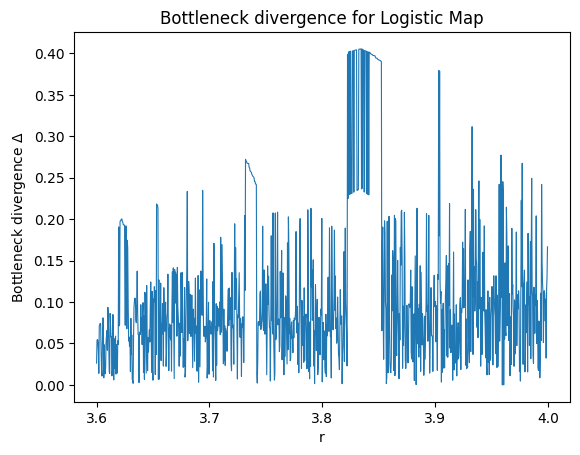

In [76]:
plt.plot(bottleneck_divergences, lw=0.8)
plt.xticks(ticks = np.arange(0, 1001, 250), labels = [round(r, 2) for r in np.arange(3.6, 4.01, 0.1)])
plt.xlabel("r")
plt.ylabel("Bottleneck divergence $\Delta$")
plt.title("Bottleneck divergence for Logistic Map")
plt.show()

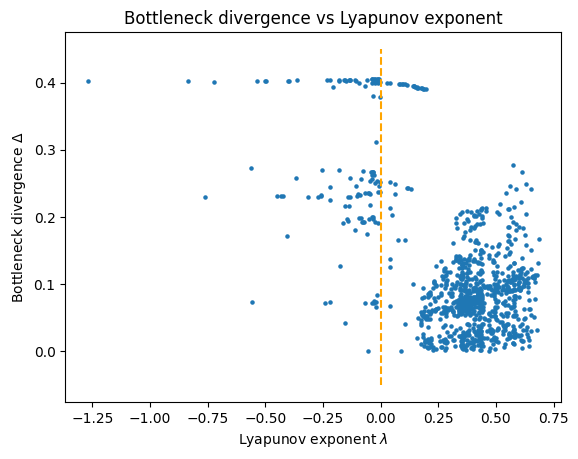

In [93]:
plt.scatter(lyapunov_exponents, bottleneck_divergences, s=5)
plt.plot([0, 0], [-0.05, 0.45], linestyle="dashed", c="orange")
plt.xlabel("Lyapunov exponent $\lambda$")
plt.ylabel("Bottleneck divergence $\Delta$")
plt.title("Bottleneck divergence vs Lyapunov exponent")
plt.show()

In [78]:
bottleneck_pearsonr = stats.pearsonr(lyapunov_exponents, bottleneck_divergences)
bottleneck_pearsonr

PearsonRResult(statistic=-0.5547337561869875, pvalue=9.012266585988314e-82)

#### Bottleneck divergence summary

For the bottleneck distance on the pairs of diagrams, we see peaks in the super-vs-sub level divergence when the Lyapunov exponent is low. There is a negative correlation of 0.54, witnessed by the clustering of bottleneck divergences at lower values when $\lambda$ is high.  

### $p$-Wasserstein Distance Between Sublevel and Superlevel Set Persistence Diagrams

We now consider divergences based on the Wasserstein distance between the sublevel and $(d,b)$-flipped superlevel persistence diagrams.

#### The 1-Wasserstein case

In [79]:
wasserstein_divergences_p1 = [wasserstein_divergence(ts, p=1.0) for ts in time_series]

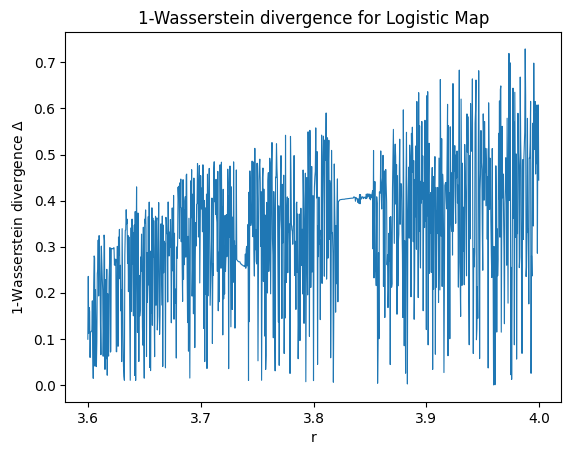

In [95]:
plt.plot(wasserstein_divergences_p1, lw=0.8)
plt.xticks(ticks = np.arange(0, 1001, 250), labels = [round(r, 2) for r in np.arange(3.6, 4.01, 0.1)])
plt.xlabel("r")
plt.ylabel("1-Wasserstein divergence $\Delta$")
plt.title("1-Wasserstein divergence for Logistic Map")
plt.show()

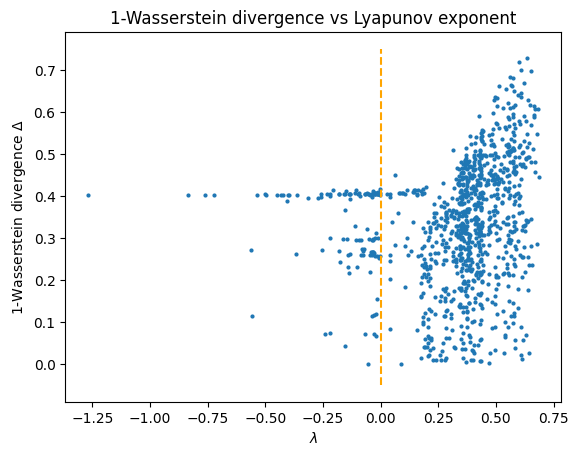

In [96]:
plt.scatter(lyapunov_exponents, wasserstein_divergences_p1, s=4)
plt.plot([0, 0], [-0.05, 0.75], linestyle="dashed", c="orange")
plt.xlabel("$\lambda$")
plt.ylabel("1-Wasserstein divergence $\Delta$")
plt.title("1-Wasserstein divergence vs Lyapunov exponent")
plt.show()

In [85]:
wasserstein_p1_pearsonr = stats.pearsonr(lyapunov_exponents, wasserstein_divergences_p1)
wasserstein_p1_pearsonr

PearsonRResult(statistic=0.19535634540741337, pvalue=4.661207882591022e-10)

#### 1-Wasserstein divergence summary

For the $p=1$ Wasserstein distance on the pairs of diagrams, there is wide variance in the divergence over the $r$ values, with stability only in the larger intervals of stability for $\lambda$. There is a small correlation of 0.2, and the divergence values do not cluster for $\lambda > 0$. Indeed they spread out, meaning there is no signal in this divergence.  

#### The 2-Wasserstein case

In [97]:
wasserstein_divergences_p2 = [wasserstein_divergence(ts, p=2.0) for ts in time_series]

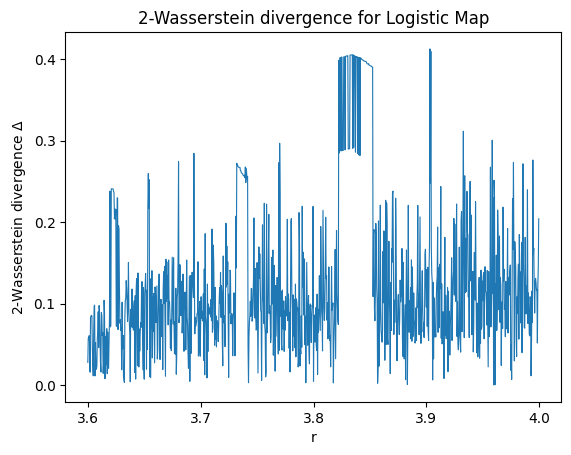

In [98]:
plt.plot(wasserstein_divergences_p2, lw=0.8)
plt.xticks(ticks = np.arange(0, 1001, 250), labels = [round(r, 2) for r in np.arange(3.6, 4.01, 0.1)])
plt.xlabel("r")
plt.ylabel("2-Wasserstein divergence $\Delta$")
plt.title("2-Wasserstein divergence for Logistic Map")
plt.show()

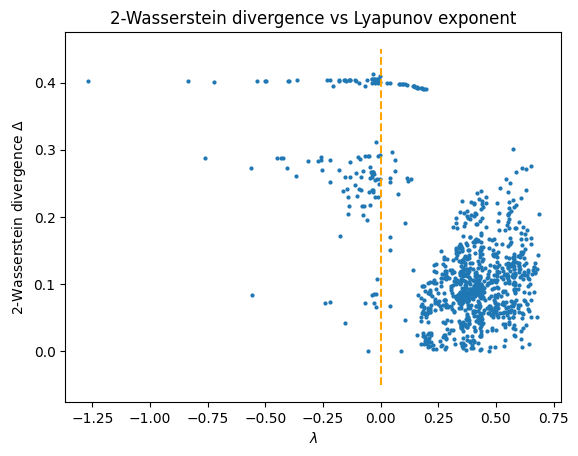

In [99]:
plt.scatter(lyapunov_exponents, wasserstein_divergences_p2, s=4)
plt.plot([0, 0], [-0.05, 0.45], linestyle="dashed", c="orange")
plt.xlabel("$\lambda$")
plt.ylabel("2-Wasserstein divergence $\Delta$")
plt.title("2-Wasserstein divergence vs Lyapunov exponent")
plt.show()

In [100]:
wasserstein_p2_pearsonr = stats.pearsonr(lyapunov_exponents, wasserstein_divergences_p2)
wasserstein_p2_pearsonr

PearsonRResult(statistic=-0.5412983465669744, pvalue=3.364183284936789e-77)

#### 2-Wasserstein divergence summary

For the $p=2$ Wasserstein distance $W_2$ on the pairs of diagrams, there is much clearer correlation of $-0.5$ between $\lambda$ and the diagram divergences. We see clustering in the $\lambda$ vs divergence scatter plot indicating a drop in divergence whenever the system is chaotic.

The pattern is similar to the bottleneck divergence, with a slightly lower correlation.

We can conjecture that the absolute value of the correlation of the $p$-Wasserstein divergence with $\lambda$ will increase as $p\to\infty$, reaching its peak at $W_\infty$, namely the bottleneck divergence.

### HVG Degree Statistics Divergence Between "Top" and "Bottom" HVGs

We now consider divergences based on the degree distributions of the "top" HVG, which corresponds to a sublevel set filtration, and the "bottom" HVG, which corresponds to a superlevel set filtration.

The authors of the peak/pit asymmetry paper cited above use the $L_1$ distance between degree distributions as their measure $\Delta\text{VGA}$ on HVGs, namely $\Delta\text{VGA} = \sum_k |P^\text{top}(k) - P^{bot}(k)|$.

We will consider the pointwise $L_1$, $L_2$, $L_\infty$ and the global Wasserstein distances between the distributions. Note that this Wasserstein distance is different from the persistence diagram Wasserstein distance, since it is an earth mover's distance on 1-d distributions.

#### The Wasserstein distance between 1d distributions case

In [101]:
hvg_peak_pit_divergences = [hvg_peak_pit_divergence(ts, distance_func="wasserstein_distance_for_1d_distributions") for ts in time_series]

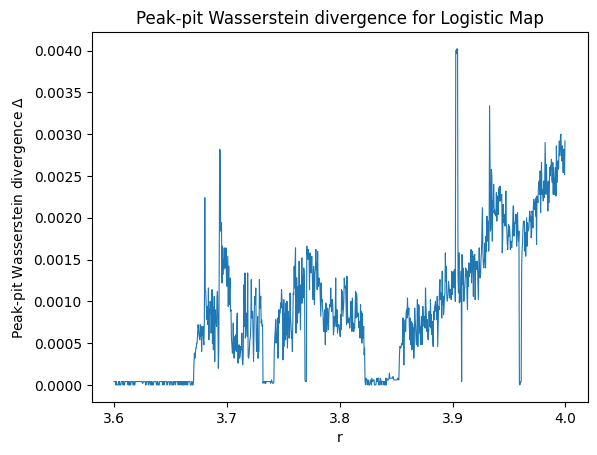

In [102]:
plt.plot(hvg_peak_pit_divergences, lw=0.8)
plt.xticks(ticks = np.arange(0, 1001, 250), labels = [round(r, 2) for r in np.arange(3.6, 4.01, 0.1)])
plt.xlabel("r")
plt.ylabel("Peak-pit Wasserstein divergence $\Delta$")
plt.title("Peak-pit Wasserstein divergence for Logistic Map")
plt.show()

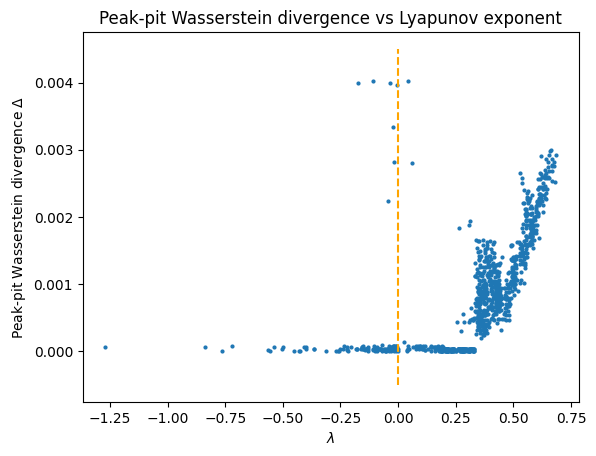

In [103]:
plt.scatter(lyapunov_exponents, hvg_peak_pit_divergences, s=4)
plt.plot([0, 0], [-0.0005, 0.0045], linestyle="dashed", c="orange")
plt.xlabel("$\lambda$")
plt.ylabel("Peak-pit Wasserstein divergence $\Delta$")
plt.title("Peak-pit Wasserstein divergence vs Lyapunov exponent")
plt.show()

In [104]:
hvg_peak_pit_pearsonr = stats.pearsonr(lyapunov_exponents, hvg_peak_pit_divergences)
hvg_peak_pit_pearsonr

PearsonRResult(statistic=0.6420127307159359, pvalue=2.798416413790884e-117)

#### Wasserstein divergence summary

There is a strong positive correlation of 0.69 with this divergence and the Lyapunov $\lambda$ showing that combinatorial information is effective at picking out chaotic dynamics.

#### Correlation between HVG and persistence diagram values

To find out the extent to which "new" information is present in the persistence diagram divergences computed above, we can establish the correlation between the bottleneck divergence and the combinatorial divergence measure taken from the HVG.

In [105]:
hvg_wasserstein_vs_persistence_bottleneck_pearsonr = stats.pearsonr(bottleneck_divergences, hvg_peak_pit_divergences)
hvg_wasserstein_vs_persistence_bottleneck_pearsonr

PearsonRResult(statistic=-0.19443518352489922, pvalue=5.64079397422651e-10)

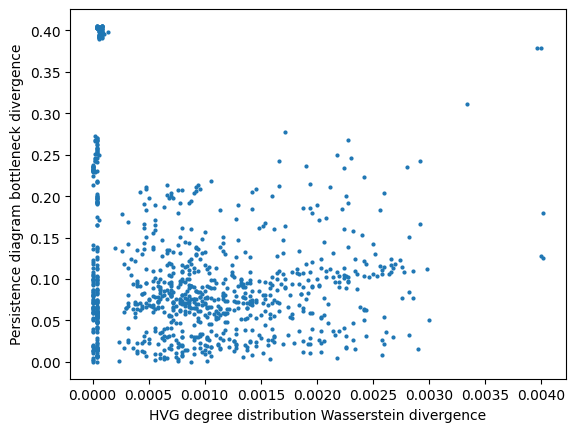

In [106]:
plt.scatter(hvg_peak_pit_divergences, bottleneck_divergences, s=4)
plt.xlabel("HVG degree distribution Wasserstein divergence")
plt.ylabel("Persistence diagram bottleneck divergence")
plt.show()

We see very low correlation between these two divergences, indicating that the persistence divergence captures substantial new information that is not available to the measure based on the combinatorics of HVGs through their degree distributions.

This indicates that combining these divergences as features in an ML pipeline is likely to improve discrimination between chaotic and non-chaotic dynamical systems.

#### Predictions using the combinatorial and metric divergences

We can combine the Wasserstein divergence for HVGs and the bottleneck divergence for PDs using PCA.

In [126]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [139]:
X = np.array(list(zip(bottleneck_divergences, hvg_peak_pit_divergences)))
# X = StandardScaler().fit_transform(X)

In [140]:
y = lyapunov_exponents > 0

In [141]:
model = RandomForestClassifier()

In [142]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [147]:
n_scores = cross_val_score(model, X[:,1].reshape(-1,1), y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [148]:
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.893 (0.018)
